In [1]:
import pandas as pd
import numpy as np
import numpy
import matplotlib.pyplot as plt
import os
import glob

In [2]:
df_train = pd.read_pickle('df_train')
df_test = pd.read_pickle('df_test')
del(df_train['DateTime'])

In [3]:
std = {'W': 1.5e5, 'HiT': 5, 'LoT' : 5}

In [4]:
df_train['W'] = df_train['W'] / std['W']
for param in ['HiT', 'LoT']:
    df_train[param] = df_train[param] / std[param]
    df_test[param] = df_test[param] / std[param]

In [5]:
df_train

,W,HiT,LoT,isWeekend
0,3.463985,6.0,3.6,0
1,3.322316,6.0,3.6,0
2,3.228695,6.0,3.6,0
3,3.109198,6.0,3.6,0
4,3.237810,6.0,3.6,0
5,3.122625,6.0,3.6,0
6,2.610293,6.0,3.6,0
7,2.879477,6.0,3.6,0
8,3.389768,6.0,3.6,0
9,4.812751,6.0,3.6,0


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back, :, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
dataset = df_train.values.reshape((-1, 24, 4))

In [9]:
dataset.shape

(77, 24, 4)

In [10]:
X, y = create_dataset(dataset, look_back=7)
X = X.reshape((X.shape[0], -1, 4))

In [11]:
X.shape, y.shape

((70, 168, 4), (70, 24))

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Input
from keras.optimizers import adagrad, adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [45]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape=(7 * 24, 4)))
model.add(Dense(50, activation='relu'))
model.add(Dense(24))

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               42000     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 24)                1224      
Total params: 48,274
Trainable params: 48,274
Non-trainable params: 0
_________________________________________________________________


In [47]:
# model.compile(loss='mean_squared_error', optimizer=adagrad(lr=0.01))
model.compile(loss='mean_squared_error', optimizer='adam')

In [48]:
num_train = 65
X_train = X[:65]
y_train = y[:65]

In [49]:
model.fit(X_train, y_train, epochs=200, batch_size=8)

Epoch 1/200
3/3 [==============================] - 2s - loss: 16.9620     
Epoch 2/200
3/3 [==============================] - 1s - loss: 15.3102     
Epoch 3/200
3/3 [==============================] - 1s - loss: 13.7250     
Epoch 4/200
3/3 [==============================] - 1s - loss: 12.1522     
Epoch 5/200
3/3 [==============================] - 1s - loss: 10.6179     
Epoch 6/200
3/3 [==============================] - 1s - loss: 9.1406     
Epoch 7/200
3/3 [==============================] - 1s - loss: 7.7241     
Epoch 8/200
3/3 [==============================] - 1s - loss: 6.5432     
Epoch 9/200
3/3 [==============================] - 1s - loss: 5.5993     
Epoch 10/200
3/3 [==============================] - 1s - loss: 4.8307     
Epoch 11/200
3/3 [==============================] - 1s - loss: 4.1126     
Epoch 12/200
3/3 [==============================] - 1s - loss: 3.4676     
Epoch 13/200
3/3 [==============================] - 1s - loss: 2.8644     
Epoch 14/200
3/3 [===========

KeyboardInterrupt: 

In [50]:
y_pred = model.predict(X[1:2])

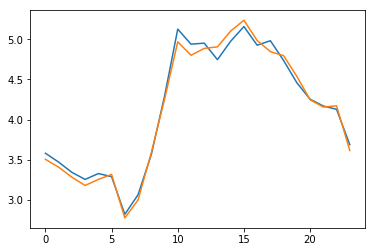

In [51]:
plt.plot(y_pred.reshape(24))
plt.plot(y[1])
plt.show()

In [60]:
model.compile(loss='mean_squared_error', optimizer=adagrad(lr=0.1))

In [61]:
model.fit(X_train, y_train, epochs=200, batch_size=1)

Epoch 1/200
3/3 [==============================] - 2s - loss: 393810859349.3333     
Epoch 2/200
3/3 [==============================] - 2s - loss: 392974510762.6667     
Epoch 3/200
3/3 [==============================] - 1s - loss: 392338953557.3333     
Epoch 4/200
3/3 [==============================] - 1s - loss: 391781242197.3333     
Epoch 5/200
3/3 [==============================] - 1s - loss: 391268248234.6667     
Epoch 6/200
3/3 [==============================] - 1s - loss: 390783849813.3333     
Epoch 7/200
3/3 [==============================] - 1s - loss: 390320051541.3333     
Epoch 8/200
3/3 [==============================] - 1s - loss: 389871916373.3333     
Epoch 9/200
3/3 [==============================] - 1s - loss: 389436506112.0000     
Epoch 10/200
3/3 [==============================] - 1s - loss: 389011701760.0000     
Epoch 11/200
3/3 [==============================] - 1s - loss: 388595635541.3333     
Epoch 12/200
3/3 [==============================] - 1s - loss: 

3/3 [==============================] - 1s - loss: 360224041642.6667     
Epoch 97/200
3/3 [==============================] - 1s - loss: 359918501888.0000     
Epoch 98/200
3/3 [==============================] - 1s - loss: 359613377194.6667     
Epoch 99/200
3/3 [==============================] - 1s - loss: 359308634794.6667     
Epoch 100/200
3/3 [==============================] - 1s - loss: 359004132693.3333     
Epoch 101/200
3/3 [==============================] - 1s - loss: 358700056576.0000     
Epoch 102/200
3/3 [==============================] - 1s - loss: 358396319061.3333     
Epoch 103/200
3/3 [==============================] - 1s - loss: 358092941994.6667     
Epoch 104/200
3/3 [==============================] - 1s - loss: 357789925376.0000     
Epoch 105/200
3/3 [==============================] - 1s - loss: 357487269205.3333     
Epoch 106/200
3/3 [==============================] - 1s - loss: 357184842410.6667     
Epoch 107/200
3/3 [==============================] - 1s - lo

3/3 [==============================] - 1s - loss: 332795598165.3333     
Epoch 191/200
3/3 [==============================] - 1s - loss: 332515868672.0000     
Epoch 192/200
3/3 [==============================] - 2s - loss: 332236313941.3333     
Epoch 193/200
3/3 [==============================] - 1s - loss: 331957021354.6667     
Epoch 194/200
3/3 [==============================] - 1s - loss: 331677990912.0000     
Epoch 195/200
3/3 [==============================] - 1s - loss: 331399178922.6667     
Epoch 196/200
3/3 [==============================] - 1s - loss: 331120552618.6667     
Epoch 197/200
3/3 [==============================] - 1s - loss: 330842188458.6667     
Epoch 198/200
3/3 [==============================] - 1s - loss: 330564053674.6667     
Epoch 199/200
3/3 [==============================] - 1s - loss: 330286159189.3333     
Epoch 200/200
3/3 [==============================] - 1s - loss: 330008461312.0000     
